In [ ]:
import tensorflow as tf
from tensorflow.keras import layers,models,regularizers
from tensorflow.keras.metrics import Precision,Recall,AUC
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
(train_images,train_labels),(test_images,test_labels)=tf.keras.datasets.cifar10.load_data()
#normalize
train_images,test_images=train_images/255.0,test_images/255.0

In [ ]:
# Check the shape of the images to ensure the correct dimensions
print(train_images.shape,test_images.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [ ]:
#define the CNN model
model = models.Sequential()

# Convolutional and pooling layers
model.add(layers.Conv2D(32, (3, 3), activation='relu',  input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))  # Add dropout

model.add(layers.Conv2D(64, (3, 3), activation='relu', ))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))


# Fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu', ))
model.add(layers.Dropout(0.5))  # Dropout on dense layer
model.add(layers.Dense(10, activation='softmax'))

In [ ]:



from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy',Precision(),Recall(),AUC()])

In [ ]:
'''train_log = model.fit(train_images, train_labels,
                      epochs=10,
                      batch_size=64,
                      validation_data=(test_images, test_labels))'''

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(datagen.flow(train_images, train_labels, batch_size=64),
                    epochs=20,
                    validation_data=(test_images, test_labels),
                    callbacks=[early_stopping])

NameError: name 'datagen' is not defined

In [ ]:
test_loss, test_accuracy, test_precision, test_recall, test_auc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Precision: {test_precision:.2f}")
print(f"Test Recall: {test_recall:.2f}")
print(f"Test AUC: {test_auc:.2f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6821 - auc: 0.9468 - loss: 0.9673 - precision: 0.7474 - recall: 0.6221
Test Accuracy: 0.68
Test Precision: 0.74
Test Recall: 0.62
Test AUC: 0.95


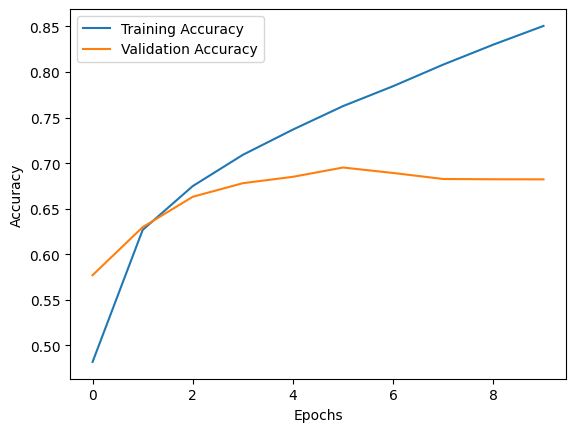

In [ ]:
#visualize training metrics

# Plot accuracy
plt.plot(train_log.history['accuracy'], label='Training Accuracy')
plt.plot(train_log.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




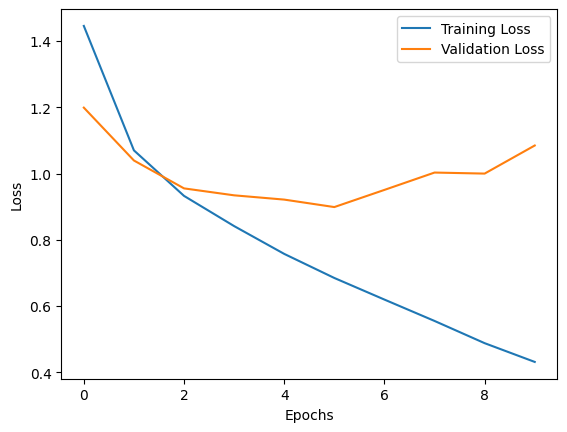

In [ ]:
# Plot loss
plt.plot(train_log.history['loss'], label='Training Loss')
plt.plot(train_log.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
model.save('my_model.keras')


In [ ]:
pred=model.predict(test_images)
pred_classes=pred.argmax(axis=1)
print(pred_classes)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[3 8 0 ... 5 4 7]
